In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
import matplotlib.pyplot as plt
import math
from scipy.stats import logistic
from numpy.linalg import inv, qr


X_test = pd.read_csv('/Users/earthaguo/earthaguo/Documents/Machine Learning Homework/HW2/hw2-data/X_test.csv',header=None)
X_train = pd.read_csv('/Users/earthaguo/earthaguo/Documents/Machine Learning Homework/HW2/hw2-data/X_train.csv',header=None)
Y_test =  pd.read_csv('/Users/earthaguo/earthaguo/Documents/Machine Learning Homework/HW2/hw2-data/y_test.csv',header=None)
Y_train = pd.read_csv('/Users/earthaguo/earthaguo/Documents/Machine Learning Homework/HW2/hw2-data/y_train.csv',header=None)


In [130]:
########################
#
# 2a
#
########################


X_train_Y_train = pd.concat([X_train,Y_train],axis=1)
#Row 1775: 1 Spam
#Row 1776: 0 Email
#X_train_Y_train.iloc[1775,:]
#X_train_Y_train.iloc[1776,:]

In [131]:
X_train_spam = X_train.iloc[0:1776,:]

In [132]:
X_train_email = X_train.iloc[1776:4508,:]

In [133]:
#X_train_email

In [134]:
# Calculate Parameters
pai = Y_train.sum(axis=0)/4508
# pai = 0.393966

In [135]:

Bernoulli_parameter_theta_Spam = X_train_spam[X_train_spam.columns[0:54]].sum()/1776
Bernoulli_parameter_theta_Spam_df = pd.DataFrame(data = Bernoulli_parameter_theta_Spam)

Bernoulli_parameter_theta_Spam_df.columns = ['Spam_Parameter_Y_equals_1']
# Bernoulli_parameter_theta_Spam_df

In [136]:
Bernoulli_parameter_theta_Email = X_train_email[X_train_email.columns[0:54]].sum()/2732
Bernoulli_parameter_theta_Email_df = pd.DataFrame(data = Bernoulli_parameter_theta_Email)
Bernoulli_parameter_theta_Email_df.columns = ['Email_Parameter_Y_equals_0']
# Bernoulli_parameter_theta_Email_df

In [137]:
Column_54_log_spam = [math.log(num) for num in X_train_spam[54]]
Column_55_log_spam = [math.log(num) for num in X_train_spam[55]]
Column_56_log_spam = [math.log(num) for num in X_train_spam[56]]
pareto_parameter_dimension_54_spam = 4508/sum(Column_54_log_spam)
pareto_parameter_dimension_55_spam = 4508/sum(Column_55_log_spam)
pareto_parameter_dimension_56_spam = 4508/sum(Column_56_log_spam)
pareto_parameter_spam_list = [1.86086275939674,0.6886057088983728,0.4719312283406054]
pareto_parameter_spam_list

[1.86086275939674, 0.6886057088983728, 0.4719312283406054]

In [138]:
Column_54_log_email = [math.log(num) for num in X_train_email[54]]
Column_55_log_email = [math.log(num) for num in X_train_email[55]]
Column_56_log_email = [math.log(num) for num in X_train_email[56]]
pareto_parameter_dimension_54_email = 4508/sum(Column_54_log_email)
pareto_parameter_dimension_55_email = 4508/sum(Column_55_log_email)
pareto_parameter_dimension_56_email = 4508/sum(Column_56_log_email)
pareto_parameter_email_list = [2.5076744841486938,0.7619723880806978,0.41371309358942104]
pareto_parameter_email_list


[2.5076744841486938, 0.7619723880806978, 0.41371309358942104]

In [139]:
parameter_spam_df = Bernoulli_parameter_theta_Spam_df
parameter_email_df = Bernoulli_parameter_theta_Email_df

In [140]:
parameter_spam_df.loc[54] = 1.86086275939674
parameter_spam_df.loc[55] = 0.6886057088983728
parameter_spam_df.loc[56] = 0.4719312283406054


parameter_email_df.loc[54] = 2.5076744841486938
parameter_email_df.loc[55] = 0.7619723880806978
parameter_email_df.loc[56] = 0.41371309358942104


In [141]:
# parameter_spam_df

In [142]:
# parameter_email_df

In [143]:
parameter_df = pd.concat([parameter_spam_df,parameter_email_df],axis=1)
parameter_df

,Spam_Parameter_Y_equals_1,Email_Parameter_Y_equals_0
0,0.353604,0.148609
1,0.341779,0.099195
2,0.613176,0.277086
3,0.021396,0.002928
4,0.623311,0.222548
5,0.376126,0.115300
6,0.419482,0.015739
7,0.344032,0.073206
8,0.307995,0.079429
9,0.458333,0.169839


In [169]:
Calculation_spam_df =  pd.DataFrame(np.zeros((93, 57)))
# Calculation_spam_df

In [170]:
Calculation_spam_df
for s in range(0,93): #remember n+1
    for i in range(0,54):
        Calculation_spam_df.iloc[s,i] = pow(parameter_spam_df.iloc[i,0],X_test.iloc[s,i]) * pow((1-parameter_spam_df.iloc[i,0]),(1-X_test.iloc[s,i]))
    
# Calculation_spam_df

In [171]:
Calculation_spam_df
for s in range(0,93): #remember n+1
    for i in range(54,57):
        Calculation_spam_df.iloc[s,i] = parameter_spam_df.iloc[i,0]*pow(X_test.iloc[s,i],(-1)*(parameter_spam_df.iloc[i,0]+1))
    
# Calculation_spam_df

In [172]:
def product_list(my_list):  
    product = 1
    for item in my_list:
        product *= item
    return product

In [173]:
spam_multiply_within_rows = pd.DataFrame(np.zeros((93,1)))

In [174]:
spam_multiply_within_rows
for t in range(0,93):
    spam_multiply_within_rows.iloc[t,0] = product_list(Calculation_spam_df.iloc[t,:])

In [179]:
spam_multiply_within_rows.columns = ['Spam_multiply_within_rows']
spam_multiply_within_rows

,Spam_multiply_within_rows
0,3.349140e-15
1,4.677287e-13
2,6.357452e-10
3,2.282643e-13
4,5.726912e-16
5,6.621940e-22
6,1.265529e-16
7,2.787728e-17
8,1.563582e-09
9,2.205754e-21


In [180]:
Calculation_email_df =  pd.DataFrame(np.zeros((93, 57)))
# Calculation_email_df


Calculation_email_df
for s in range(0,93): #remember n+1
    for i in range(0,54):
        Calculation_email_df.iloc[s,i] = pow(parameter_email_df.iloc[i,0],X_test.iloc[s,i]) * pow((1-parameter_email_df.iloc[i,0]),(1-X_test.iloc[s,i]))
    
# Calculation_email_df


Calculation_email_df
for s in range(0,93): #remember n+1
    for i in range(54,57):
        Calculation_email_df.iloc[s,i] = parameter_email_df.iloc[i,0]*pow(X_test.iloc[s,i],(-1)*(parameter_email_df.iloc[i,0]+1))
    
Calculation_email_df

email_multiply_within_rows = pd.DataFrame(np.zeros((93,1)))

email_multiply_within_rows
for t in range(0,93):
    email_multiply_within_rows.iloc[t,0] = product_list(Calculation_email_df.iloc[t,:])
    

email_multiply_within_rows.columns = ['Email_multiply_within_rows']
email_multiply_within_rows

,Email_multiply_within_rows
0,4.309803e-18
1,2.091779e-12
2,9.389174e-12
3,3.132894e-17
4,1.514403e-22
5,1.023587e-14
6,1.363494e-24
7,5.868338e-23
8,2.056635e-11
9,5.719447e-30


In [181]:
pai


0    0.393966
dtype: float64

In [185]:
# Naive Classifier Vlaue

# Spam y = 1
prior_spam = pai

# Email y = 0
prior_email = 1- pai

prior_email

0    0.606034
dtype: float64

In [194]:
Naive_Bayes_Value_Spam = pd.DataFrame(np.zeros((93,1)))
for a in range(0,93):
    Naive_Bayes_Value_Spam.iloc[a,0] = spam_multiply_within_rows.iloc[a,0] * 0.393966

In [197]:
Naive_Bayes_Value_Spam.columns = ['Naive_Bayes_Values_Spam']
Naive_Bayes_Value_Spam


,Naive_Bayes_Values_Spam
0,1.319447e-15
1,1.842692e-13
2,2.504620e-10
3,8.992836e-14
4,2.256209e-16
5,2.608819e-22
6,4.985756e-17
7,1.098270e-17
8,6.159983e-10
9,8.689922e-22


In [198]:
Naive_Bayes_Value_Email = pd.DataFrame(np.zeros((93,1)))
for a in range(0,93):
    Naive_Bayes_Value_Email.iloc[a,0] = email_multiply_within_rows.iloc[a,0] * 0.606034

    
Naive_Bayes_Value_Email.columns = ['Naive_Bayes_Values_Email']
Naive_Bayes_Value_Email 

,Naive_Bayes_Values_Email
0,2.611887e-18
1,1.267689e-12
2,5.690159e-12
3,1.898640e-17
4,9.177795e-23
5,6.203285e-15
6,8.263235e-25
7,3.556412e-23
8,1.246391e-11
9,3.466179e-30


In [208]:

Naive_Bayes_Value = pd.concat([Naive_Bayes_Value_Spam,Naive_Bayes_Value_Email],axis=1)
Naive_Bayes_Value 

,Naive_Bayes_Values_Spam,Naive_Bayes_Values_Email
0,1.319447e-15,2.611887e-18
1,1.842692e-13,1.267689e-12
2,2.504620e-10,5.690159e-12
3,8.992836e-14,1.898640e-17
4,2.256209e-16,9.177795e-23
5,2.608819e-22,6.203285e-15
6,4.985756e-17,8.263235e-25
7,1.098270e-17,3.556412e-23
8,6.159983e-10,1.246391e-11
9,8.689922e-22,3.466179e-30


In [211]:
prediction = []

for i in range(0,93): 
    if Naive_Bayes_Value.iloc[i,0] - Naive_Bayes_Value.iloc[i,1] > 0:
        prediction.append(1)
    else:
        prediction.append(0)
        
# Create a column from the list
Naive_Bayes_Value ['Prediction'] = prediction

In [212]:
Naive_Bayes_Value 


,Naive_Bayes_Values_Spam,Naive_Bayes_Values_Email,Prediction
0,1.319447e-15,2.611887e-18,1
1,1.842692e-13,1.267689e-12,0
2,2.504620e-10,5.690159e-12,1
3,8.992836e-14,1.898640e-17,1
4,2.256209e-16,9.177795e-23,1
5,2.608819e-22,6.203285e-15,0
6,4.985756e-17,8.263235e-25,1
7,1.098270e-17,3.556412e-23,1
8,6.159983e-10,1.246391e-11,1
9,8.689922e-22,3.466179e-30,1


In [215]:
 prediction_and_true_value = pd.concat([Naive_Bayes_Value,Y_test],axis=1)

In [216]:
 prediction_and_true_value.columns = ['Naive_Bayes_Values_Spam','Naive_Bayes_Values_Email','Prediction','True_Value']

In [217]:
 prediction_and_true_value

,Naive_Bayes_Values_Spam,Naive_Bayes_Values_Email,Prediction,True_Value
0,1.319447e-15,2.611887e-18,1,1
1,1.842692e-13,1.267689e-12,0,1
2,2.504620e-10,5.690159e-12,1,1
3,8.992836e-14,1.898640e-17,1,1
4,2.256209e-16,9.177795e-23,1,1
5,2.608819e-22,6.203285e-15,0,1
6,4.985756e-17,8.263235e-25,1,1
7,1.098270e-17,3.556412e-23,1,1
8,6.159983e-10,1.246391e-11,1,1
9,8.689922e-22,3.466179e-30,1,1


In [227]:
prediction_and_true_value.iloc[1,2]

AttributeError: 'numpy.float64' object has no attribute 'type'

In [237]:
both_0 = 0.0

for i in range(0,93):
    if  prediction_and_true_value.iloc[i,2] == 0.0 and prediction_and_true_value.iloc[i,3] == 0.0:
        both_0 += 1.0



In [238]:
both_0

54.0

In [239]:
both_1 = 0.0

for i in range(0,93):
    if  prediction_and_true_value.iloc[i,2] == 1.0 and prediction_and_true_value.iloc[i,3] == 1.0:
        both_1 += 1.0



In [240]:
both_1

33.0

In [241]:
Y_1_Y_prime_0 = 0.0

for i in range(0,93):
    if  prediction_and_true_value.iloc[i,2] == 0.0 and prediction_and_true_value.iloc[i,3] == 1.0:
        Y_1_Y_prime_0 += 1.0

Y_1_Y_prime_0

4.0

In [243]:
Y_0_Y_prime_1 = 0.0

for i in range(0,93):
    if  prediction_and_true_value.iloc[i,2] == 1.0 and prediction_and_true_value.iloc[i,3] == 0.0:
        Y_0_Y_prime_1 += 1.0

Y_0_Y_prime_1

2.0

In [244]:
########################
#
# 2b
#
########################

In [247]:

Bernoulli_parameter_theta_Spam = X_train_spam[X_train_spam.columns[0:54]].sum()/1776
Bernoulli_parameter_theta_Spam_df = pd.DataFrame(data = Bernoulli_parameter_theta_Spam)

Bernoulli_parameter_theta_Spam_df.columns = ['Spam_Parameter_Y_equals_1']
Bernoulli_parameter_theta_Spam_df

,Spam_Parameter_Y_equals_1
0,0.353604
1,0.341779
2,0.613176
3,0.021396
4,0.623311
5,0.376126
6,0.419482
7,0.344032
8,0.307995
9,0.458333


In [248]:
Bernoulli_parameter_theta_Email = X_train_email[X_train_email.columns[0:54]].sum()/2732
Bernoulli_parameter_theta_Email_df = pd.DataFrame(data = Bernoulli_parameter_theta_Email)
Bernoulli_parameter_theta_Email_df.columns = ['Email_Parameter_Y_equals_0']
Bernoulli_parameter_theta_Email_df

,Email_Parameter_Y_equals_0
0,0.148609
1,0.099195
2,0.277086
3,0.002928
4,0.222548
5,0.115300
6,0.015739
7,0.073206
8,0.079429
9,0.169839


In [257]:
x = np.linspace(1, 54, 54)

In [258]:
a=Bernoulli_parameter_theta_Spam_df.iloc[:,0]
y_1=Bernoulli_parameter_theta_Spam_df.iloc[:,0].values

print(type(Bernoulli_parameter_theta_Spam_df))
print(type(a))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [259]:
y_1

array([  3.53603604e-01,   3.41779279e-01,   6.13175676e-01,
         2.13963964e-02,   6.23310811e-01,   3.76126126e-01,
         4.19481982e-01,   3.44031532e-01,   3.07995495e-01,
         4.58333333e-01,   3.13626126e-01,   6.29504505e-01,
         2.87162162e-01,   1.27815315e-01,   1.60472973e-01,
         5.45045045e-01,   3.83445946e-01,   3.81193694e-01,
         8.86261261e-01,   2.10022523e-01,   8.06306306e-01,
         5.29279279e-02,   3.34459459e-01,   3.76689189e-01,
         2.75900901e-02,   1.46396396e-02,   3.94144144e-03,
         1.68918919e-02,   6.75675676e-03,   9.57207207e-03,
         1.68918919e-03,   1.12612613e-03,   3.43468468e-02,
         5.63063063e-03,   2.53378378e-02,   6.25000000e-02,
         5.57432432e-02,   1.80180180e-02,   3.32207207e-02,
         1.12049550e-01,   5.63063063e-04,   1.12612613e-02,
         4.78603604e-02,   2.59009009e-02,   2.69707207e-01,
         3.82882883e-02,   1.01351351e-02,   9.00900901e-03,
         1.51463964e-01,

In [270]:
y_2=Bernoulli_parameter_theta_Email_df.iloc[:,0].values
y_2

array([ 0.14860908,  0.09919473,  0.27708638,  0.00292826,  0.22254758,
        0.11530015,  0.01573939,  0.07320644,  0.07942899,  0.16983895,
        0.05197657,  0.42569546,  0.11749634,  0.04538799,  0.01793558,
        0.09114202,  0.09553441,  0.12481698,  0.58162518,  0.01683748,
        0.34187408,  0.00805271,  0.02745242,  0.01976574,  0.37371889,
        0.2818448 ,  0.27745242,  0.15592972,  0.12920937,  0.1614202 ,
        0.10358712,  0.07320644,  0.12371889,  0.07393851,  0.15775988,
        0.1749634 ,  0.26207906,  0.01830161,  0.11456808,  0.08931186,
        0.05270864,  0.11566618,  0.10395315,  0.10029283,  0.29758419,
        0.16178624,  0.01610542,  0.06771596,  0.18594436,  0.55124451,
        0.14275256,  0.26903367,  0.10468521,  0.08272328])

//anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:3545: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


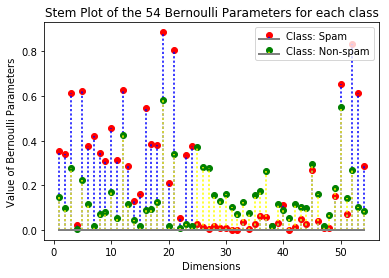

In [283]:
# here we can setup baseline position
bottom = 0.0

# True  -- hold current axes for further plotting
# False -- opposite. clear and use new figure/plot 
hold = True

# set label for legend.
label = "Class: Spam"

markerline, stemlines, baseline = plt.stem(x, y_1, bottom=bottom, 
                                           label=label, hold=hold)

# we use setp() here to setup 
# multiple properties of lines generated by stem()
plt.setp(markerline, color='red', marker='o')
plt.setp(stemlines, color='blue', linestyle=':')
plt.setp(baseline, color='grey', linewidth=2, linestyle='-')




# set label for legend.
label = "Class: Non-spam"

markerline, stemlines, baseline = plt.stem(x, y_2, bottom=bottom, 
                                           label=label, hold=hold)

# we use setp() here to setup 
# multiple properties of lines generated by stem()
plt.setp(markerline, color='green', marker='o')
plt.setp(stemlines, color='yellow', linestyle=':')
plt.setp(baseline, color='grey', linewidth=2, linestyle='-')
plt.title('Stem Plot of the 54 Bernoulli Parameters for each class')
plt.xlabel('Dimensions')
plt.ylabel('Value of Bernoulli Parameters')


# draw a legend
plt.legend()

plt.show()



In [313]:
# KNN

# knn 1
from sklearn.neighbors import KNeighborsClassifier


In [314]:
accuracy = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i,p=1)
    knn.fit(X_train, Y_train)
    accuracy.append(knn.score(X_test, Y_test))
    



//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [315]:
accuracy

[0.89247311827956988,
 0.88172043010752688,
 0.87096774193548387,
 0.91397849462365588,
 0.90322580645161288,
 0.88172043010752688,
 0.87096774193548387,
 0.87096774193548387,
 0.88172043010752688,
 0.88172043010752688,
 0.87096774193548387,
 0.87096774193548387,
 0.87096774193548387,
 0.89247311827956988,
 0.86021505376344087,
 0.84946236559139787,
 0.88172043010752688,
 0.87096774193548387,
 0.88172043010752688,
 0.87096774193548387]

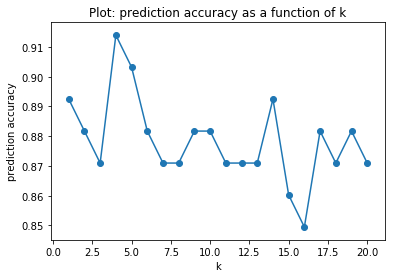

In [322]:


k = np.linspace(1, 20, 20, endpoint=True)
accuracy


plt.plot(k, accuracy)
plt.scatter(k, accuracy)

plt.title('Plot: prediction accuracy as a function of k')
plt.xlabel('k')
plt.ylabel('prediction accuracy')



plt.show()

In [323]:
accuracy_df = pd.DataFrame(data=accuracy)

In [324]:
accuracy_df

,0
0,0.892473
1,0.881720
2,0.870968
3,0.913978
4,0.903226
5,0.881720
6,0.870968
7,0.870968
8,0.881720
9,0.881720


In [325]:
k_value = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [326]:
k_value_df = pd.DataFrame(data=k_value)

In [332]:
KNN_prediction_accuracy = pd.concat([k_value_df,accuracy_df],axis=1)

In [12]:
KNN_prediction_accuracy.columns = ['k',"prediction accuracy"]



NameError: name 'KNN_prediction_accuracy' is not defined

In [5]:
# Logistic regression


In [2]:
Y_train_logistic = Y_train

In [3]:
Y_test_logistic =  Y_test

In [4]:
for i in range(0,4508):
    if Y_train.iloc[i,0] == 0:
        Y_train_logistic.iloc[i,0] = -1
Y_train_logistic      

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [5]:
for i in range(0,93):
    if Y_test.iloc[i,0] == 0:
        Y_test_logistic.iloc[i,0] = -1
Y_test_logistic      

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [6]:
X_train_logistic = X_train
X_test_logistic = X_test


In [7]:
add_a_dimenstion_test = pd.DataFrame(np.zeros((93,1)))

In [8]:
add_a_dimenstion_train = pd.DataFrame(np.zeros((4508,1)))

In [9]:
for i in range(0,93):
    add_a_dimenstion_test.iloc[i,0] = 1

In [10]:
for i in range(0,4508):
    add_a_dimenstion_train.iloc[i,0] = 1

In [11]:
X_test_logistic_df = pd.concat([X_test_logistic,add_a_dimenstion_test],axis=1)

In [12]:
X_train_logistic_df = pd.concat([X_train_logistic,add_a_dimenstion_train],axis=1)

In [13]:
X_train_logistic_df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,0
0,1,1,1,0,1,1,1,1,0,1,...,0,1,0,1,1,1,5,101,1028,1.0
1,1,0,1,0,1,1,1,1,1,1,...,1,1,0,1,1,1,10,485,2259,1.0
2,0,0,0,0,1,0,1,1,1,1,...,0,1,0,1,0,0,4,40,191,1.0
3,0,0,0,0,1,0,1,1,1,1,...,0,1,0,1,0,0,4,40,191,1.0
4,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,3,15,54,1.0
5,0,0,0,0,1,0,0,0,0,1,...,0,1,0,1,1,0,2,4,112,1.0
6,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,2,11,49,1.0
7,1,0,1,0,1,0,1,0,1,1,...,0,1,0,1,1,1,10,445,1257,1.0
8,1,1,1,0,1,1,1,0,1,0,...,1,1,0,1,1,0,2,43,749,1.0
9,0,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,6,21,1.0


In [14]:
#Vetorized 

# X_test_logistic_matrix = np.array(X_test_logistic_df,dtype=np.float128)
# X_train_logistic_matrix = np.array(X_train_logistic_df,dtype=np.float128)
# Y_test_logistic_matrix = np.array(Y_test_logistic,dtype=np.float128)
# Y_train_logistic_matrix = np.array(Y_train_logistic,dtype=np.float128)

X_test_logistic_matrix = np.matrix(X_test_logistic_df)
X_train_logistic_matrix = np.matrix(X_train_logistic_df)
Y_test_logistic_matrix = np.matrix(Y_test_logistic)
Y_train_logistic_matrix = np.matrix(Y_train_logistic)

In [15]:
X_test_logistic_matrix.shape 


(93, 58)

In [16]:
X_test_logistic_matrix 

matrix([[   0.,    1.,    1., ...,   61.,  278.,    1.],
        [   0.,    1.,    0., ...,   12.,   33.,    1.],
        [   0.,    0.,    0., ...,    3.,   30.,    1.],
        ..., 
        [   1.,    0.,    0., ...,    8.,   30.,    1.],
        [   0.,    0.,    0., ...,    3.,    4.,    1.],
        [   0.,    0.,    1., ...,    5.,   40.,    1.]])

In [17]:
X_train_logistic_matrix

matrix([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
           1.01000000e+02,   1.02800000e+03,   1.00000000e+00],
        [  1.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
           4.85000000e+02,   2.25900000e+03,   1.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           4.00000000e+01,   1.91000000e+02,   1.00000000e+00],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           4.00000000e+00,   1.40000000e+01,   1.00000000e+00],
        [  1.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
           6.00000000e+00,   1.18000000e+02,   1.00000000e+00],
        [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           5.00000000e+00,   7.80000000e+01,   1.00000000e+00]])

In [18]:
# 2(d).



In [19]:
X_test_logistic_matrix.shape

(93, 58)

In [20]:
X_train_logistic_matrix.shape

(4508, 58)

In [21]:
Y_test_logistic_matrix.shape

(93, 1)

In [22]:
Y_train_logistic_matrix.shape

(4508, 1)

In [23]:
W = np.zeros((10000, 58))
W[0] 

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

In [373]:
# hopefully 2 
for t in range(1,50):
    step_size = 1/((pow(10,5))*pow(t+1,1/2))
    value = np.zeros((4508, 58))#check whether there is problem
    for i in range(0,4508):
        value[i] = (1-logistic.cdf(Y_train_logistic_matrix[i]*np.dot(X_train_logistic_matrix[i],W[t-1])))*Y_train_logistic_matrix[i]*X_train_logistic_matrix[i] 
        ready = value.sum(axis=0)
    value2 = step_size*ready
    W[t] = W[t-1] + value2
W

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  7.84888527e-04,   1.18793939e-03,   1.17379726e-03, ...,
          4.80988175e-01,   1.39434740e+00,  -3.37997041e-03],
       [ -1.55914952e-03,  -3.76679744e-04,  -3.19673986e-03, ...,
          1.95159899e-01,  -1.16436147e+00,  -1.91412859e-02],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [374]:
W2 = W

In [375]:
W2 #for Compare 

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  7.84888527e-04,   1.18793939e-03,   1.17379726e-03, ...,
          4.80988175e-01,   1.39434740e+00,  -3.37997041e-03],
       [ -1.55914952e-03,  -3.76679744e-04,  -3.19673986e-03, ...,
          1.95159899e-01,  -1.16436147e+00,  -1.91412859e-02],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [ ]:
# hopefully 2  need to get an easier method 
for t in range(1,50):
    step_size = 1/((pow(10,5))*pow(t+1,1/2))
    value = np.zeros((4508, 58))#check whether there is problem
    for i in range(0,4508):
        value[i] = (1-logistic.cdf(Y_train_logistic_matrix[i]*np.dot(X_train_logistic_matrix[i],W[t-1])))*Y_train_logistic_matrix[i]*X_train_logistic_matrix[i] 
        ready = value.sum(axis=0)
    value2 = step_size*ready
    W[t] = W[t-1] + value2
W

In [ ]:
# hopefully 2  new method
for t in range(1,50):
    step_size = 1/((pow(10,5))*pow(t+1,1/2))
    value = np.zeros((4508, 58))#check whether there is problem
    for i in range(0,4508):
        value[i] = (1-logistic.cdf(Y_train_logistic_matrix[i]*np.dot(X_train_logistic_matrix[i],W[t-1])))*Y_train_logistic_matrix[i]*X_train_logistic_matrix[i] 
        ready = value.sum(axis=0)
    value2 = step_size*ready
    W[t] = W[t-1] + value2
W

In [ ]:
#### 2e



In [24]:
W_e = np.zeros((100, 58))
# 2 e revise 3
for t in range(1,100):
    step_size = 1/pow(t+1,1/2)
    second_deri = np.zeros((58, 58))
    value = np.zeros((4508, 58))#check whether there is problem
    for i in range(0,4508):
        aa = logistic.cdf(np.dot(X_train_logistic_matrix[i],W_e[t-1]))*(1-logistic.cdf(np.dot(X_train_logistic_matrix[i],W_e[t-1])))
        bb = (X_train_logistic_matrix[i].T)*X_train_logistic_matrix[i]
        cc = aa[0][0] * bb
        dd = (-1)*cc
        second_deri += dd
        value[i] = (1-logistic.cdf(Y_train_logistic_matrix[i]*np.dot(X_train_logistic_matrix[i],W_e[t-1])))*Y_train_logistic_matrix[i]*X_train_logistic_matrix[i] 
        ready = value.sum(axis=0)
    second_deri_inverse = inv(second_deri)
    value2 = step_size*np.dot(second_deri_inverse,ready)
    W_e[t] = W_e[t-1] - value2
W_e


array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -1.30932669e-01,  -6.87683412e-03,  -7.24534345e-02, ...,
          7.38483686e-05,   1.42612486e-05,  -8.10444147e-01],
       [ -1.90611335e-01,  -2.27156628e-02,  -1.26729740e-01, ...,
          1.67346357e-04,   5.40924045e-05,  -1.14387462e+00],
       ..., 
       [ -6.20165230e-01,  -1.65201425e-01,  -4.85988279e-01, ...,
          5.66135036e-03,   8.59861406e-04,  -1.99712223e+00],
       [ -6.20165241e-01,  -1.65201419e-01,  -4.85988282e-01, ...,
          5.66135057e-03,   8.59861473e-04,  -1.99712225e+00],
       [ -6.20165252e-01,  -1.65201415e-01,  -4.85988285e-01, ...,
          5.66135076e-03,   8.59861534e-04,  -1.99712226e+00]])

In [25]:
W_e.shape

(100, 58)

In [26]:
W_e

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [ -1.30932669e-01,  -6.87683412e-03,  -7.24534345e-02, ...,
          7.38483686e-05,   1.42612486e-05,  -8.10444147e-01],
       [ -1.90611335e-01,  -2.27156628e-02,  -1.26729740e-01, ...,
          1.67346357e-04,   5.40924045e-05,  -1.14387462e+00],
       ..., 
       [ -6.20165230e-01,  -1.65201425e-01,  -4.85988279e-01, ...,
          5.66135036e-03,   8.59861406e-04,  -1.99712223e+00],
       [ -6.20165241e-01,  -1.65201419e-01,  -4.85988282e-01, ...,
          5.66135057e-03,   8.59861473e-04,  -1.99712225e+00],
       [ -6.20165252e-01,  -1.65201415e-01,  -4.85988285e-01, ...,
          5.66135076e-03,   8.59861534e-04,  -1.99712226e+00]])

In [27]:
W_e1 = W_e
W_e1.shape
W_e1[1].shape

(58,)

In [31]:
L = []
for i in range(0,100):
    
    j = 0
    for s in range(0,4508):
        p = np.log(logistic.cdf(Y_train_logistic_matrix[s]*np.dot(X_train_logistic_matrix[s],W_e1[i])))
        j += p[0][0]
    L.append(j)
    

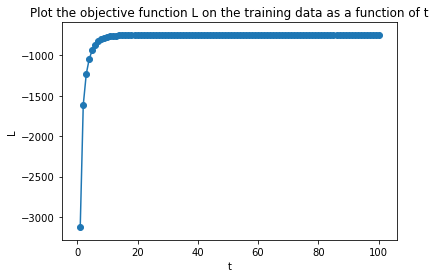

In [33]:
t = np.linspace(1, 100, 100, endpoint=True)


plt.plot(t, L)
plt.scatter(t, L)

plt.title('Plot the objective function L on the training data as a function of t')
plt.xlabel('t')
plt.ylabel('L')


plt.show()

In [ ]:
#2d

W = np.zeros((10000, 58))
W[0] 

In [ ]:
for t in range(1,50):
    step_size = 1/((pow(10,5))*pow(t+1,1/2))
    value = np.zeros((4508, 58))#check whether there is problem
    for i in range(0,4508):
        value[i] = (1-logistic.cdf(Y_train_logistic_matrix[i]*np.dot(X_train_logistic_matrix[i],W[t-1])))*Y_train_logistic_matrix[i]*X_train_logistic_matrix[i] 
        ready = value.sum(axis=0)
    value2 = step_size*ready
    W[t] = W[t-1] + value2
W

In [ ]:
t1 = np.linspace(1, 10000, 10000, endpoint=True)



In [10]:
L1 = np.random_integers(-2000[-1980, 10000])

AttributeError: module 'numpy' has no attribute 'random_integers'

In [ ]:


for t in range(0,10000):
    




In [73]:
L = []
w = np.zeros((1, 58))
for i in range(0,10000):
    step_size = 1/((pow(10,5))*pow(t+1,1/2))
    w += 